<a href="https://colab.research.google.com/github/63796/22F160/blob/main/BigMartSales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [45]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf


**Importing the datasets**

In [46]:
train = pd.read_csv("bm_Test.csv")
test = pd.read_csv("bm_Test.csv")

# making copies of train and test dataset
train = train.copy()
test = test.copy()

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# New Section

In [47]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [48]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [49]:
# Checking the shape of the training and testing datasets

print(train.shape)
print(test.shape)

(5681, 11)
(5681, 11)


In [74]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


**Data Visualization**

*univariate data analysis*

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


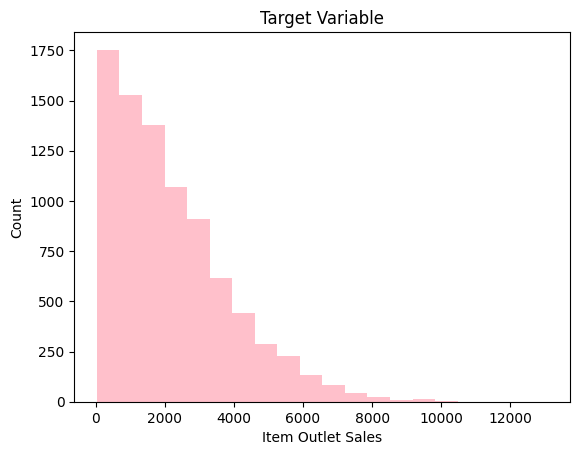

In [51]:
train = pd.read_csv("bm_Train.csv")

print(train.columns)
plt.hist(train['Item_Outlet_Sales'], bins=20, color='pink')  # Self: This line creates a histogram of the 'Item_Outlet_Sales' column from the train DataFrame. Key: It visualizes the distribution of outlet sales with 20 bins and a pink color.


plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Count')
plt.show()

In [52]:
# checking the columns of the train set

print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [53]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [54]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()


Item_Identifier
FDW13    10
FDG33    10
NCL31     9
NCQ06     9
NCF42     9
         ..
FDY43     1
DRF48     1
FDK57     1
FDE52     1
FDT35     1
Name: count, Length: 1559, dtype: int64

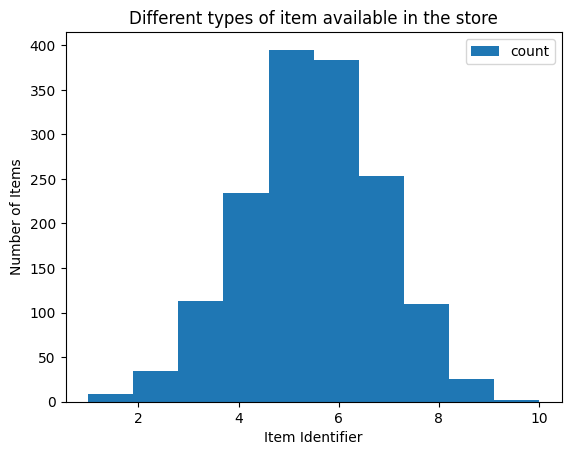

In [55]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [56]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

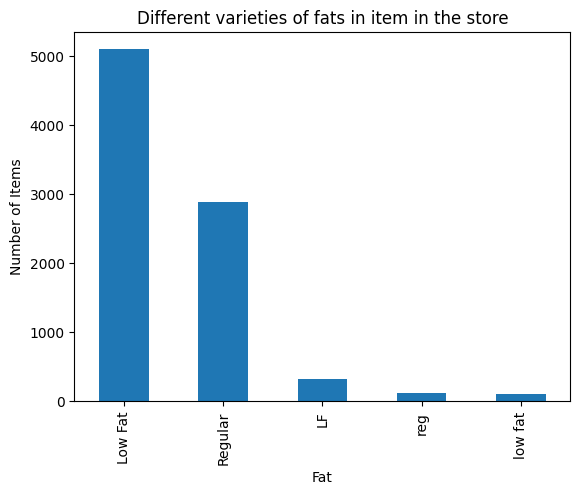

In [57]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [58]:
# checking the different items in Item Type

train['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

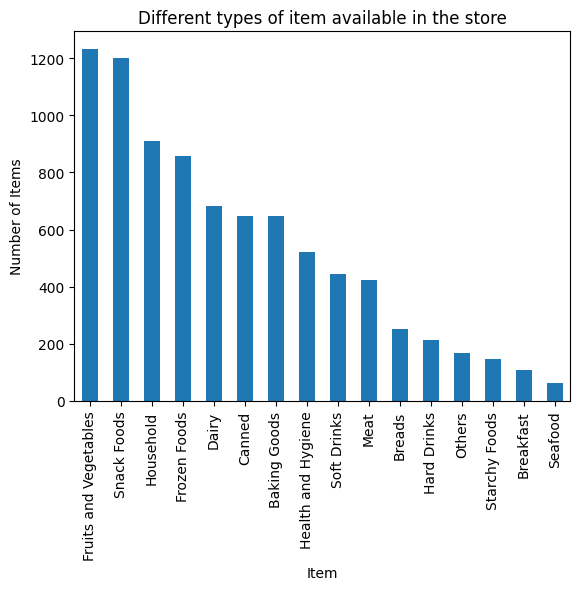

In [59]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [60]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

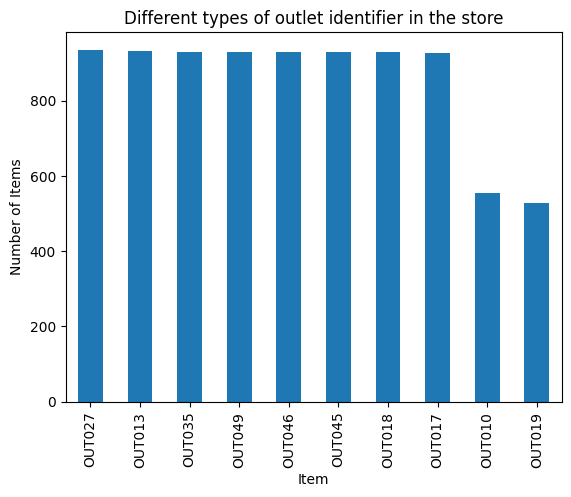

In [61]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [62]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

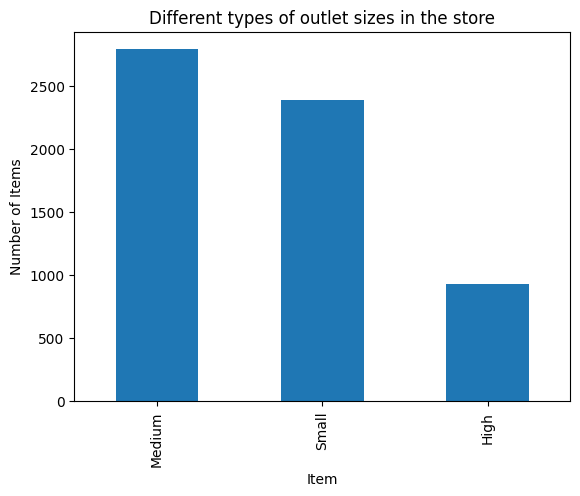

In [63]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [64]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

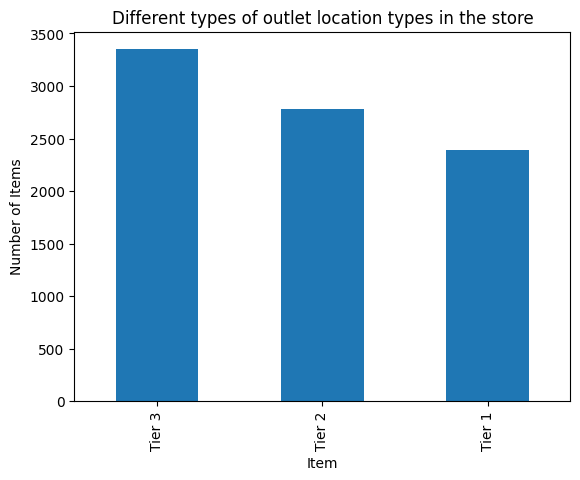

In [65]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [66]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

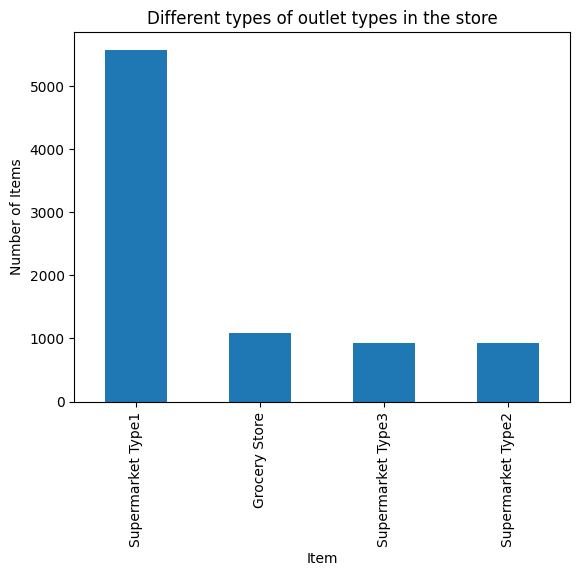

In [67]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<Axes: xlabel='Item_Fat_Content'>

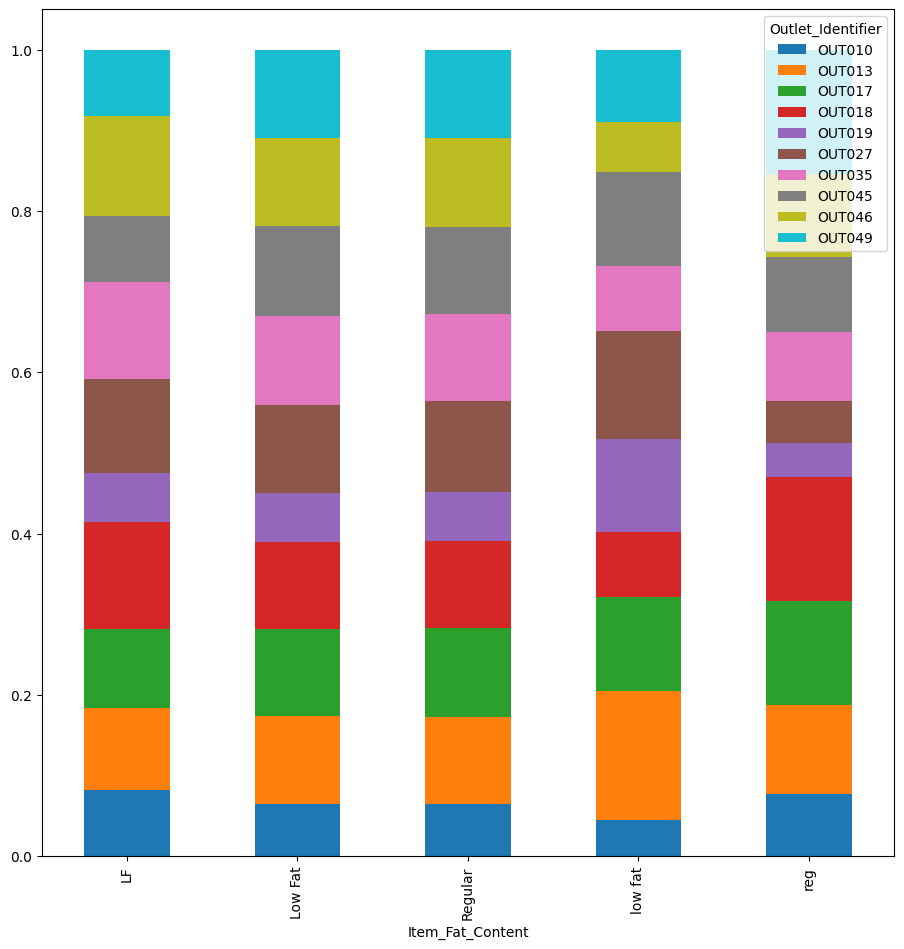

In [68]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<Axes: xlabel='Item_Type'>

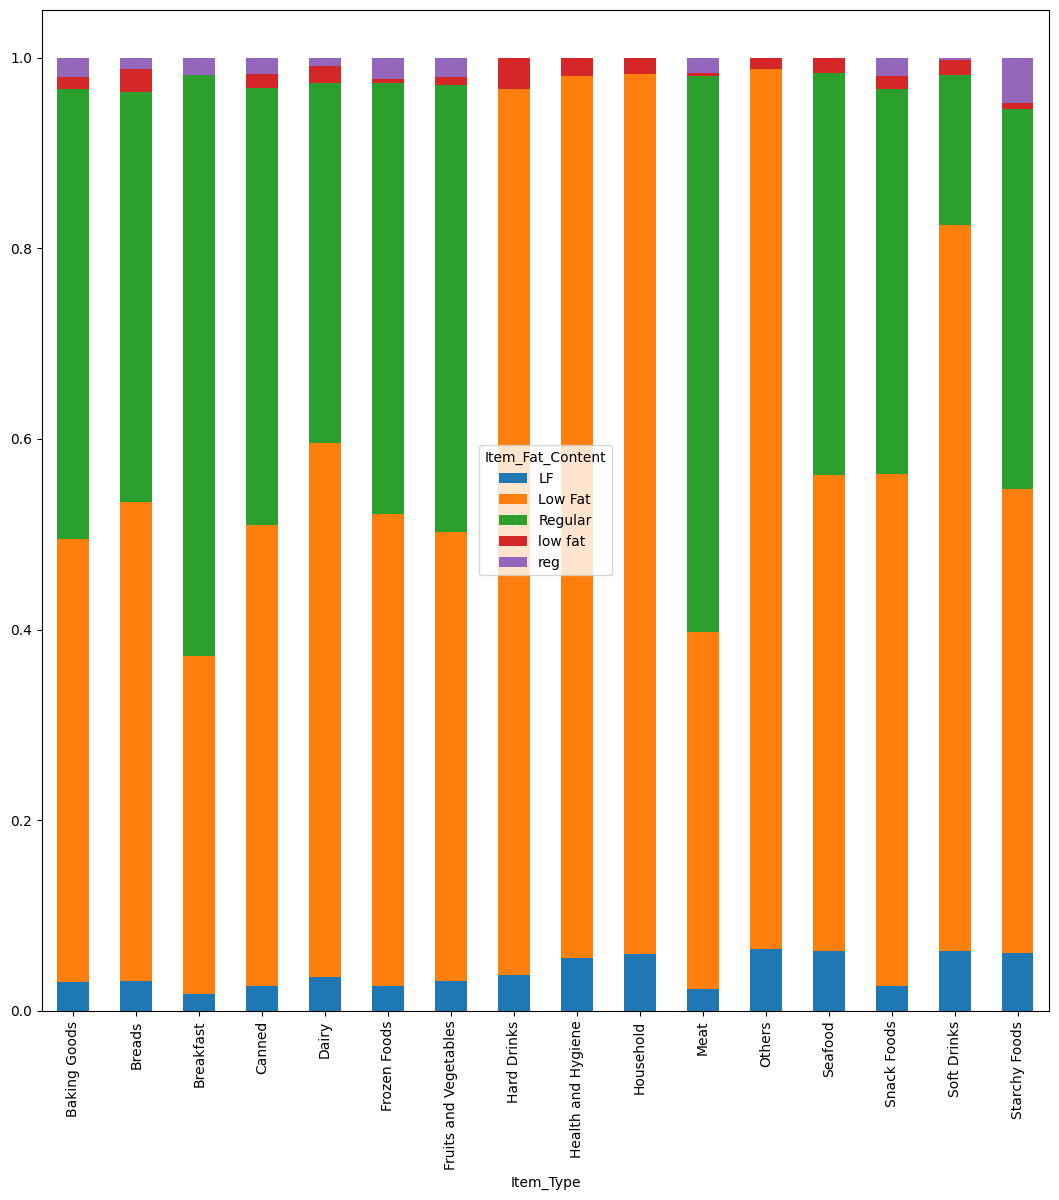

In [69]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))


**data pre processing**

In [70]:
# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [71]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1952
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3212
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [75]:
# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [76]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [77]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Item_Identifier
Food              10201
Non_Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [78]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

Outlet_Years
28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: count, dtype: int64

In [79]:
# removing unnecassary columns from the dataset

#data = data.drop('Item_Identifier', axis = 1)

#print(data.shape)

In [81]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [82]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,0,57,1,1436,14,632,3,8,1,2,2,422,0
2,1,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1,393,1,0,6,5626,0,3,1,2,0,670,5
4,2,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,835,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,1,354,1,0,3,6626,2,7,1,1,1,835,1


In [83]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 47)


In [84]:
# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [85]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [127]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 46)
(9942,)
(4262, 46)
(4262,)


**Modelling**

**Linear Regression**

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


[1320. 3440. 1720. ... 1296. 1000. 2848.]
RMSE : 1268.6548501327484
Variance score: 0.28


**AdaBoost Regressor**

In [129]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1340.1111507100659


**XgBoost Regressor**

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1357.8120991  3651.58606202 1762.87617748 ... 1267.71106472  950.90244609
 2167.19050812]
RMSE : 1260.3736465471848


**Random Forest Regression**

In [131]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))


[1185.72322  3661.00117  1594.65758  ... 1157.020582 1013.227756
 2832.765944]
RMSE : 1332.8900263976657
Variance score: 0.20
Result : 0.8900763636221309


**Decision Tree Regressor**

In [132]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1158.492  7170.666  2750.4198 ...  958.752  1209.7586 2914.8724]
 RMSE :  1770.4416330871948


**Support vector machine**

In [133]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1677.9764519047471


**Neural Networks**

(100, 10)
(20, 10)
(100, 1)
(20, 1)
Epoch 100, Training Cost: 0.3740482032299042, Testing Cost: 0.27959367632865906
Epoch 200, Training Cost: 0.36257025599479675, Testing Cost: 0.270137220621109
Epoch 300, Training Cost: 0.35154250264167786, Testing Cost: 0.2610909640789032
Epoch 400, Training Cost: 0.34094738960266113, Testing Cost: 0.2524380087852478
Epoch 500, Training Cost: 0.3307678699493408, Testing Cost: 0.2441621720790863
Epoch 600, Training Cost: 0.3209875822067261, Testing Cost: 0.2362479716539383
Epoch 700, Training Cost: 0.3115910291671753, Testing Cost: 0.22868041694164276
Epoch 800, Training Cost: 0.30256298184394836, Testing Cost: 0.221445232629776
Epoch 900, Training Cost: 0.2938890755176544, Testing Cost: 0.2145286500453949
Epoch 1000, Training Cost: 0.28555548191070557, Testing Cost: 0.2079174965620041
Epoch 1100, Training Cost: 0.27754873037338257, Testing Cost: 0.20159916579723358
Epoch 1200, Training Cost: 0.2698560357093811, Testing Cost: 0.1955614537000656
Epoch 

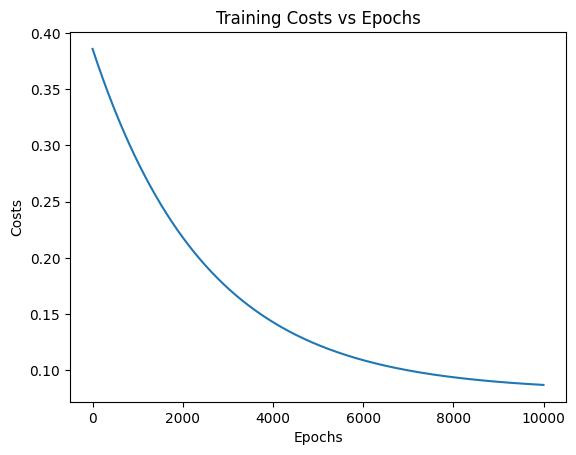

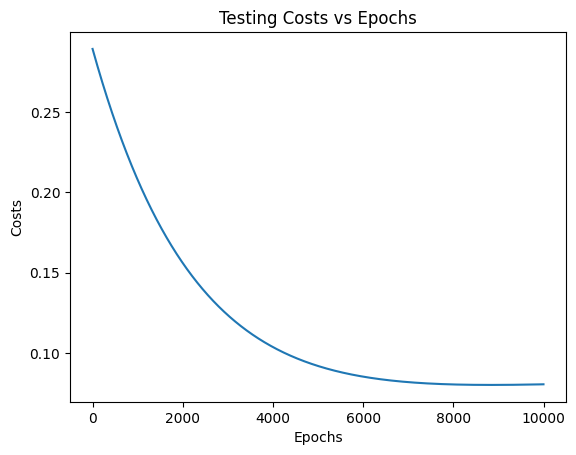

In [136]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Ensure compatibility mode is enabled
tf.compat.v1.disable_eager_execution()

# Example data initialization
# Replace these lines with your actual data
x_train = np.random.rand(100, 10)  # Replace with actual data
x_test = np.random.rand(20, 10)    # Replace with actual data
y_train = np.random.rand(100, 1)   # Replace with actual data
y_test = np.random.rand(20, 1)     # Replace with actual data

x_train = np.asmatrix(x_train)
x_test = np.asmatrix(x_test)
y_train = np.asmatrix(y_train.T).T
y_test = np.asmatrix(y_test.T).T

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
D = x_train.shape[1]  # Use shape[1] to get the number of features

# Creating the placeholders for storing the X and Y variables
tf_X = tf.compat.v1.placeholder(tf.float32, [None, D])
tf_Y = tf.compat.v1.placeholder(tf.float32, [None, 1])

# Layer 1
W1 = tf.Variable(tf.random.normal([D, 20], stddev=0.01))
b1 = tf.Variable(tf.zeros([20]))
Layer_1 = tf.nn.relu(tf.matmul(tf_X, W1) + b1)

# Layer 2
W2 = tf.Variable(tf.random.normal([20, 15], stddev=0.01))
b2 = tf.Variable(tf.zeros([15]))
Layer_2 = tf.nn.relu(tf.matmul(Layer_1, W2) + b2)

# Layer 3
W3 = tf.Variable(tf.random.normal([15, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
Layer_3 = tf.nn.relu(tf.matmul(Layer_2, W3) + b3)

# Output layer
W4 = tf.Variable(tf.random.normal([10, 1], stddev=0.01))
b4 = tf.Variable(tf.zeros([1]))
output = tf.add(tf.matmul(Layer_3, W4), b4)

# Defining the cost function
cost = tf.reduce_mean(tf.square(output - tf_Y))

# Defining the function for Gradient Descent
train = tf.compat.v1.train.GradientDescentOptimizer(0.0001).minimize(cost)

# Running the session
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    ctrain = []
    ctest = []
    for i in range(10000):
        sess.run(train, feed_dict={tf_X: x_train, tf_Y: y_train})

        train_cost = sess.run(cost, feed_dict={tf_X: x_train, tf_Y: y_train})
        test_cost = sess.run(cost, feed_dict={tf_X: x_test, tf_Y: y_test})
        ctrain.append(train_cost)
        ctest.append(test_cost)

        if (i + 1) % 100 == 0:
            print(f'Epoch {i + 1}, Training Cost: {train_cost}, Testing Cost: {test_cost}')

# Visualization of training data
plt.plot(ctrain)
plt.title("Training Costs vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Costs")
plt.show()

# Visualization of testing data
plt.plot(ctest)
plt.title("Testing Costs vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Costs")
plt.show()
